In [155]:
import numpy as np
import pandas as pd

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

## Key ##

TEAM: The Division I college basketball school

CONF: The Athletic Conference in which the school participates in (A10 = Atlantic 10, ACC = Atlantic Coast Conference, AE = America East, Amer = American, ASun = ASUN, B10 = Big Ten, B12 = Big 12, BE = Big East, BSky = Big Sky, BSth = Big South, BW = Big West, CAA = Colonial Athletic Association, CUSA = Conference USA, Horz = Horizon League, Ivy = Ivy League, MAAC = Metro Atlantic Athletic Conference, MAC = Mid-American Conference, MEAC = Mid-Eastern Athletic Conference, MVC = Missouri Valley Conference, MWC = Mountain West, NEC = Northeast Conference, OVC = Ohio Valley Conference, P12 = Pac-12, Pat = Patriot League, SB = Sun Belt, SC = Southern Conference, SEC = South Eastern Conference, Slnd = Southland Conference, Sum = Summit League, SWAC = Southwestern Athletic Conference, WAC = Western Athletic Conference, WCC = West Coast Conference)

G: Number of games played

W: Number of games won

ADJOE: Adjusted Offensive Efficiency (An estimate of the offensive efficiency (points scored per 100 possessions) a team would have against the average Division I defense)

ADJDE: Adjusted Defensive Efficiency (An estimate of the defensive efficiency (points allowed per 100 possessions) a team would have against the average Division I offense)

*BARTHAG (we eventually delete this, see below): Power Rating (Chance of beating an average Division I team)

EFG_O: Effective Field Goal Percentage Shot

EFG_D: Effective Field Goal Percentage Allowed

TOR: Turnover Percentage Allowed (Turnover Rate)

TORD: Turnover Percentage Committed (Steal Rate)

ORB: Offensive Rebound Rate

DRB: Offensive Rebound Rate Allowed

FTR : Free Throw Rate (How often the given team shoots Free Throws)

FTRD: Free Throw Rate Allowed

2P_O: Two-Point Shooting Percentage

2P_D: Two-Point Shooting Percentage Allowed

3P_O: Three-Point Shooting Percentage

3P_D: Three-Point Shooting Percentage Allowed

ADJ_T: Adjusted Tempo (An estimate of the tempo (possessions per 40 minutes) a team would have against the team that wants to play at an average Division I tempo)

WAB: Wins Above Bubble (The bubble refers to the cut off between making the NCAA March Madness Tournament and not making it)

POSTSEASON: Round where the given team was eliminated or where their season ended (R68 = First Four, R64 = Round of 64, R32 = Round of 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Final Four, 2ND = Runner-up, Champion = Winner of the NCAA March Madness Tournament for that given year)

SEED: Seed in the NCAA March Madness Tournament

YEAR: Season

## Data Cleaning ##

Below is our original file, a dataset we found on Kaggle ((https://www.kaggle.com/datasets/andrewsundberg/college-basketball-dataset?resource=download)) that has all of the season long statistics for every college basketball team since 2013.


In [80]:
import os
downloads_path = os.path.expanduser("~" + os.sep + "Downloads")
file_path = os.path.join(downloads_path, "archive", "cbb.csv")

# Read the CSV file
cbb = pd.read_csv(file_path)
cbb.head(10)

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017
5,Kentucky,SEC,40,29,117.2,96.2,0.9062,49.9,46.0,18.1,...,36.8,50.0,44.9,33.2,32.2,65.9,3.9,2ND,8.0,2014
6,Michigan,B10,38,30,121.5,93.7,0.9522,54.6,48.0,14.6,...,22.7,53.4,47.6,37.9,32.6,64.8,6.2,2ND,4.0,2013
7,Duke,ACC,39,35,125.2,90.6,0.9764,56.6,46.5,16.3,...,23.9,55.9,46.3,38.7,31.4,66.4,10.7,Champions,1.0,2015
8,Virginia,ACC,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,...,26.3,52.5,45.7,39.5,28.9,60.7,11.1,Champions,1.0,2019
9,North Carolina,ACC,39,33,121.0,91.5,0.9615,51.7,48.1,16.2,...,31.6,51.0,46.3,35.5,33.9,72.8,8.4,Champions,1.0,2017


We realized though that this dataset includes March Madness games, the very games we are trying to predict. So, this dataset was unfit for our purposes. We went to the source of the Kaggle dataset, barttorvik.com, a reputable college basketball statistics website, and scraped the data on our own, filtering the data by date so as to not include games in the tournament. This also allowed us to add five more seasons to our data that were available at barttorvik.com but were not in the Kaggle dataset, potentially because barttorvik.com used to only have stats dating back to 2013, if I remember correctly. 

In [83]:
cbb3 = pd.read_csv("cbb_trial1.csv", encoding='latin-1')
cbb3.head(10)
#here is our data that we scraped off of barttorvik.com

,YEAR,TEAM,CONF,G,REC,ADJOE,ADJDE,BARTHAG,EFG%,EFGD%,...,FTR,FTRD,2P%,2P%D,3P%,3P%D,3PR,3PRD,ADJ T.,WAB
0,2008,Kansas,B12,33,30Ð3,121,85.6,0.9816,56.3,44.8,...,37.5,30.8,54.8,40.9,39.9,34,29.2,38.1,69.5,9.9
1,NaN,"ÊÊÊ1 seed,ÊCHAMPS",NaN,NaN,13Ð3,1,3,1,4,18,...,140,56,7,4,13,106,287,283,91,3
2,2008,North Carolina,ACC,34,32Ð2,120.2,91.8,0.9572,52.4,48,...,39.1,25.5,51.2,47,37.8,33.2,22.2,34.8,75.1,11.9
3,NaN,"ÊÊÊ1 seed,ÊFinal Four",NaN,NaN,14Ð2,2,23,6,71,82,...,98,10,67,109,57,71,340,188,8,1
4,2008,Texas,B12,33,27Ð6,120,94.2,0.9419,51.4,46.1,...,32.6,29.7,48.7,43.6,37.7,33.2,34.3,38.9,64.8,8.4
5,NaN,"ÊÊÊ2 seed,ÊElite Eight",NaN,NaN,13Ð3,3,46,8,111,28,...,263,45,156,23,62,71,166,299,262,7
6,2008,Drake,MVC,30,26Ð4,118,96.3,0.9126,52.8,49.8,...,34.3,23.7,50.9,49.2,36.6,33.8,45.5,39.3,64.2,5.2
7,NaN,"ÊÊÊ5 seed, R64",NaN,NaN,15Ð3,4,73,19,56,166,...,234,5,76,206,101,93,10,307,283,12
8,2008,Oregon,P10,31,18Ð13,117.8,101.2,0.8517,56.3,50.2,...,36.9,33.3,53.9,50.1,40.1,33.6,39,35.3,67.9,0.8
9,NaN,"ÊÊÊ9 seed, R64",NaN,NaN,9Ð9,5,162,41,4,184,...,163,105,13,240,10,83,67,206,139,39


As you can see, the above data is very messy. Every odd row does not have a team in it but rather more information (and very important information at that - the team's finish is what we are trying to predict, and their seed is also a very key feature) on the team above it, and there are many cells with strange characters in them. Lots of cleaning needed to be done before we explored the improved dataset.

In [84]:
#First, we remove all "Ê" characters
cbb3['TEAM'] = cbb3['TEAM'].str.replace('Ê', '')

cbb3.head(10)

,YEAR,TEAM,CONF,G,REC,ADJOE,ADJDE,BARTHAG,EFG%,EFGD%,...,FTR,FTRD,2P%,2P%D,3P%,3P%D,3PR,3PRD,ADJ T.,WAB
0,2008,Kansas,B12,33,30Ð3,121,85.6,0.9816,56.3,44.8,...,37.5,30.8,54.8,40.9,39.9,34,29.2,38.1,69.5,9.9
1,NaN,"1 seed,CHAMPS",NaN,NaN,13Ð3,1,3,1,4,18,...,140,56,7,4,13,106,287,283,91,3
2,2008,North Carolina,ACC,34,32Ð2,120.2,91.8,0.9572,52.4,48,...,39.1,25.5,51.2,47,37.8,33.2,22.2,34.8,75.1,11.9
3,NaN,"1 seed,Final Four",NaN,NaN,14Ð2,2,23,6,71,82,...,98,10,67,109,57,71,340,188,8,1
4,2008,Texas,B12,33,27Ð6,120,94.2,0.9419,51.4,46.1,...,32.6,29.7,48.7,43.6,37.7,33.2,34.3,38.9,64.8,8.4
5,NaN,"2 seed,Elite Eight",NaN,NaN,13Ð3,3,46,8,111,28,...,263,45,156,23,62,71,166,299,262,7
6,2008,Drake,MVC,30,26Ð4,118,96.3,0.9126,52.8,49.8,...,34.3,23.7,50.9,49.2,36.6,33.8,45.5,39.3,64.2,5.2
7,NaN,"5 seed, R64",NaN,NaN,15Ð3,4,73,19,56,166,...,234,5,76,206,101,93,10,307,283,12
8,2008,Oregon,P10,31,18Ð13,117.8,101.2,0.8517,56.3,50.2,...,36.9,33.3,53.9,50.1,40.1,33.6,39,35.3,67.9,0.8
9,NaN,"9 seed, R64",NaN,NaN,9Ð9,5,162,41,4,184,...,163,105,13,240,10,83,67,206,139,39


In [85]:
#Now, we'll replace Ð with a dash to mark each team's record (making our dataframe more readable)
cbb3['REC'] = cbb3['REC'].str.replace('Ð', '–')
cbb3.head(10)

,YEAR,TEAM,CONF,G,REC,ADJOE,ADJDE,BARTHAG,EFG%,EFGD%,...,FTR,FTRD,2P%,2P%D,3P%,3P%D,3PR,3PRD,ADJ T.,WAB
0,2008,Kansas,B12,33,30–3,121,85.6,0.9816,56.3,44.8,...,37.5,30.8,54.8,40.9,39.9,34,29.2,38.1,69.5,9.9
1,NaN,"1 seed,CHAMPS",NaN,NaN,13–3,1,3,1,4,18,...,140,56,7,4,13,106,287,283,91,3
2,2008,North Carolina,ACC,34,32–2,120.2,91.8,0.9572,52.4,48,...,39.1,25.5,51.2,47,37.8,33.2,22.2,34.8,75.1,11.9
3,NaN,"1 seed,Final Four",NaN,NaN,14–2,2,23,6,71,82,...,98,10,67,109,57,71,340,188,8,1
4,2008,Texas,B12,33,27–6,120,94.2,0.9419,51.4,46.1,...,32.6,29.7,48.7,43.6,37.7,33.2,34.3,38.9,64.8,8.4
5,NaN,"2 seed,Elite Eight",NaN,NaN,13–3,3,46,8,111,28,...,263,45,156,23,62,71,166,299,262,7
6,2008,Drake,MVC,30,26–4,118,96.3,0.9126,52.8,49.8,...,34.3,23.7,50.9,49.2,36.6,33.8,45.5,39.3,64.2,5.2
7,NaN,"5 seed, R64",NaN,NaN,15–3,4,73,19,56,166,...,234,5,76,206,101,93,10,307,283,12
8,2008,Oregon,P10,31,18–13,117.8,101.2,0.8517,56.3,50.2,...,36.9,33.3,53.9,50.1,40.1,33.6,39,35.3,67.9,0.8
9,NaN,"9 seed, R64",NaN,NaN,9–9,5,162,41,4,184,...,163,105,13,240,10,83,67,206,139,39


In [87]:
cbb3.iloc[10693:]
#we realized that the last couple of rows are empty, so we removed these rows.

,YEAR,TEAM,CONF,G,REC,ADJOE,ADJDE,BARTHAG,EFG%,EFGD%,...,FTR,FTRD,2P%,2P%D,3P%,3P%D,3PR,3PRD,ADJ T.,WAB
10693,2023,LIU Brooklyn,NEC,27,1–26,86.4,115.6,0.0338,45.6,55.1,...,31.7,32.1,44.8,54.6,32,37.4,24.3,35.2,73.3,-21.3
10694,NaN,NaN,NaN,NaN,1–15,363,358,363,344,349,...,170,211,343,337,284,339,362,114,5,360
10695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
cbb3 = cbb3.drop(cbb3.index[10695:], axis=0)
cbb3.reset_index(drop=True, inplace=True)
cbb3.tail(10)

,YEAR,TEAM,CONF,G,REC,ADJOE,ADJDE,BARTHAG,EFG%,EFGD%,...,FTR,FTRD,2P%,2P%D,3P%,3P%D,3PR,3PRD,ADJ T.,WAB
10685,2023,Evansville,MVC,32,5–27,90.1,107.8,0.1135,45.1,55.7,...,29.4,30.1,43.4,54.9,32.2,38,33.6,41.2,70.3,-20.5
10686,NaN,NaN,NaN,NaN,1–19,359,268,349,351,355,...,244,150,353,341,273,348,288,303,59,359
10687,2023,Merrimack,NEC,32,16–16,88.9,98.7,0.2313,48.3,49.1,...,34.6,26.9,48.2,48.9,32.3,33,43.8,32.5,66.9,-11.8
10688,NaN,NaN,NaN,NaN,12–4,360,86,301,289,102,...,81,59,263,114,269,108,38,38,231,251
10689,2023,Hartford,ind,25,2–23,88.7,116.7,0.0412,47.7,55.4,...,24.1,27.7,47.4,53.8,32,38.7,40.3,37.5,66.2,-20
10690,NaN,NaN,NaN,NaN,0–2,361,360,362,301,352,...,350,78,288,321,284,355,97,190,278,355
10691,2023,Florida A&M,SWAC,27,5–22,88.2,108.1,0.0877,45,51.1,...,31.4,44.6,43.2,51.8,32.1,33.2,35.5,34.6,65.8,-16.3
10692,NaN,NaN,NaN,NaN,5–13,362,276,359,353,206,...,179,357,355,256,275,121,244,90,292,329
10693,2023,LIU Brooklyn,NEC,27,1–26,86.4,115.6,0.0338,45.6,55.1,...,31.7,32.1,44.8,54.6,32,37.4,24.3,35.2,73.3,-21.3
10694,NaN,NaN,NaN,NaN,1–15,363,358,363,344,349,...,170,211,343,337,284,339,362,114,5,360


Now that we have removed all of the strange characters, we can move forward with extracting the seed and tournament finish from the "TEAM" column, using a similar strategy to the one we used when we predicted who wrote what Federalist paper at the beginning of DATA 11800. We had to make sure to put those values in the row ABOVE, since we just want one row per team.

In [89]:
cbb3['SEED'] = None
cbb3['FINISH'] = None

for index, row in cbb3.iterrows():
    if pd.notna(row['TEAM']) and 'seed' in row['TEAM']:
        seed_part = row['TEAM'].split(' seed')[0].lstrip('Ê')  # We were getting an error saying we still had Ê before some integers, so we remove them with this line
        seed = int(seed_part) if seed_part.isdigit() else None  # Convert to integer, handling non-numeric values
        finish = row['TEAM'].split(',')[1]
        
        # Here, we update the values in the row above
        if index > 0:
            cbb3.at[index - 1, 'SEED'] = seed
            cbb3.at[index - 1, 'FINISH'] = finish

cbb3.reset_index(drop=True, inplace=True)
cbb3.head(10)

,YEAR,TEAM,CONF,G,REC,ADJOE,ADJDE,BARTHAG,EFG%,EFGD%,...,2P%,2P%D,3P%,3P%D,3PR,3PRD,ADJ T.,WAB,SEED,FINISH
0,2008,Kansas,B12,33,30–3,121,85.6,0.9816,56.3,44.8,...,54.8,40.9,39.9,34,29.2,38.1,69.5,9.9,1,CHAMPS
1,NaN,"1 seed,CHAMPS",NaN,NaN,13–3,1,3,1,4,18,...,7,4,13,106,287,283,91,3,None,None
2,2008,North Carolina,ACC,34,32–2,120.2,91.8,0.9572,52.4,48,...,51.2,47,37.8,33.2,22.2,34.8,75.1,11.9,1,Final Four
3,NaN,"1 seed,Final Four",NaN,NaN,14–2,2,23,6,71,82,...,67,109,57,71,340,188,8,1,None,None
4,2008,Texas,B12,33,27–6,120,94.2,0.9419,51.4,46.1,...,48.7,43.6,37.7,33.2,34.3,38.9,64.8,8.4,2,Elite Eight
5,NaN,"2 seed,Elite Eight",NaN,NaN,13–3,3,46,8,111,28,...,156,23,62,71,166,299,262,7,None,None
6,2008,Drake,MVC,30,26–4,118,96.3,0.9126,52.8,49.8,...,50.9,49.2,36.6,33.8,45.5,39.3,64.2,5.2,5,R64
7,NaN,"5 seed, R64",NaN,NaN,15–3,4,73,19,56,166,...,76,206,101,93,10,307,283,12,None,None
8,2008,Oregon,P10,31,18–13,117.8,101.2,0.8517,56.3,50.2,...,53.9,50.1,40.1,33.6,39,35.3,67.9,0.8,9,R64
9,NaN,"9 seed, R64",NaN,NaN,9–9,5,162,41,4,184,...,13,240,10,83,67,206,139,39,None,None


Now that we have the information that we need from the alternate rows, we can delete them by deleting any row in the column "TEAM" that says "NaN" or "seed", since those are the ones we do not want.

In [90]:
cbb3 = cbb3[~cbb3['TEAM'].astype(str).str.contains('NaN|seed', case=False, na=False)]
cbb.reset_index(drop=True, inplace=True)
cbb3

,YEAR,TEAM,CONF,G,REC,ADJOE,ADJDE,BARTHAG,EFG%,EFGD%,...,2P%,2P%D,3P%,3P%D,3PR,3PRD,ADJ T.,WAB,SEED,FINISH
0,2008,Kansas,B12,33,30–3,121,85.6,0.9816,56.3,44.8,...,54.8,40.9,39.9,34,29.2,38.1,69.5,9.9,1,CHAMPS
2,2008,North Carolina,ACC,34,32–2,120.2,91.8,0.9572,52.4,48,...,51.2,47,37.8,33.2,22.2,34.8,75.1,11.9,1,Final Four
4,2008,Texas,B12,33,27–6,120,94.2,0.9419,51.4,46.1,...,48.7,43.6,37.7,33.2,34.3,38.9,64.8,8.4,2,Elite Eight
6,2008,Drake,MVC,30,26–4,118,96.3,0.9126,52.8,49.8,...,50.9,49.2,36.6,33.8,45.5,39.3,64.2,5.2,5,R64
8,2008,Oregon,P10,31,18–13,117.8,101.2,0.8517,56.3,50.2,...,53.9,50.1,40.1,33.6,39,35.3,67.9,0.8,9,R64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10685,2023,Evansville,MVC,32,5–27,90.1,107.8,0.1135,45.1,55.7,...,43.4,54.9,32.2,38,33.6,41.2,70.3,-20.5,None,None
10687,2023,Merrimack,NEC,32,16–16,88.9,98.7,0.2313,48.3,49.1,...,48.2,48.9,32.3,33,43.8,32.5,66.9,-11.8,None,None
10689,2023,Hartford,ind,25,2–23,88.7,116.7,0.0412,47.7,55.4,...,47.4,53.8,32,38.7,40.3,37.5,66.2,-20,None,None
10691,2023,Florida A&M,SWAC,27,5–22,88.2,108.1,0.0877,45,51.1,...,43.2,51.8,32.1,33.2,35.5,34.6,65.8,-16.3,None,None


We are going to delete the BARTHAG column, since that is a metric calculated by the bartorvik website that calculates each team's "power ranking", or "Chance of beating an average Division I team". Since it is essentially a product of all of the other stats, much like we hope our model will be, we will remove it from the dataset. However, it is not a metric we want to compare ours to because ours is specifically for the Round of 64 of March Madness, not necessarily what it takes to be a good team in general.

In [91]:
cbb3.drop('BARTHAG', axis=1, inplace=True)
cbb3.head(10)

,YEAR,TEAM,CONF,G,REC,ADJOE,ADJDE,EFG%,EFGD%,TOR,...,2P%,2P%D,3P%,3P%D,3PR,3PRD,ADJ T.,WAB,SEED,FINISH
0,2008,Kansas,B12,33,30–3,121,85.6,56.3,44.8,18.7,...,54.8,40.9,39.9,34,29.2,38.1,69.5,9.9,1,CHAMPS
2,2008,North Carolina,ACC,34,32–2,120.2,91.8,52.4,48,19,...,51.2,47,37.8,33.2,22.2,34.8,75.1,11.9,1,Final Four
4,2008,Texas,B12,33,27–6,120,94.2,51.4,46.1,14.1,...,48.7,43.6,37.7,33.2,34.3,38.9,64.8,8.4,2,Elite Eight
6,2008,Drake,MVC,30,26–4,118,96.3,52.8,49.8,18.1,...,50.9,49.2,36.6,33.8,45.5,39.3,64.2,5.2,5,R64
8,2008,Oregon,P10,31,18–13,117.8,101.2,56.3,50.2,18.6,...,53.9,50.1,40.1,33.6,39,35.3,67.9,0.8,9,R64
10,2008,Duke,ACC,32,27–5,117.2,88.8,54.1,47.6,18.2,...,51.8,47.1,38.4,32.8,39.1,24.8,73.7,8.9,2,R32
12,2008,UCLA,P10,33,30–3,116.4,86.9,52.3,48,18.8,...,52.9,46.8,33.8,34.2,28.1,27.9,66.2,10.8,1,Final Four
14,2008,Tennessee,SEC,32,28–4,116.3,92.2,52.8,49.2,17.7,...,51.7,50.8,36.4,31,39.1,35.6,72.7,9.2,2,Sweet Sixteen
16,2008,Pittsburgh,BE,34,25–9,116.1,95.7,51.1,48,18.4,...,51,47.3,34.3,32.8,30.3,34.7,65.2,5.3,4,R32
18,2008,California,P10,31,16–15,115.6,102,52.5,51.8,19.1,...,51.6,50.6,36.3,35.7,32.2,39.8,69.8,-1.3,None,None


To make our data more numerical, we will change each team's record (cbb3.REC) to their total amount of wins entering the March Madness tournament, and then add a column with their win percentage. That way, we can compare each team's record more easily (it is hard to graph a quantity with a dash in the middle of it).

In [92]:
cbb3[['WINS', 'LOSSES']] = cbb3['REC'].str.split('–', expand=True).apply(pd.to_numeric, errors='coerce')

cbb3.head(10)

,YEAR,TEAM,CONF,G,REC,ADJOE,ADJDE,EFG%,EFGD%,TOR,...,3P%,3P%D,3PR,3PRD,ADJ T.,WAB,SEED,FINISH,WINS,LOSSES
0,2008,Kansas,B12,33,30–3,121,85.6,56.3,44.8,18.7,...,39.9,34,29.2,38.1,69.5,9.9,1,CHAMPS,30.0,3.0
2,2008,North Carolina,ACC,34,32–2,120.2,91.8,52.4,48,19,...,37.8,33.2,22.2,34.8,75.1,11.9,1,Final Four,32.0,2.0
4,2008,Texas,B12,33,27–6,120,94.2,51.4,46.1,14.1,...,37.7,33.2,34.3,38.9,64.8,8.4,2,Elite Eight,27.0,6.0
6,2008,Drake,MVC,30,26–4,118,96.3,52.8,49.8,18.1,...,36.6,33.8,45.5,39.3,64.2,5.2,5,R64,26.0,4.0
8,2008,Oregon,P10,31,18–13,117.8,101.2,56.3,50.2,18.6,...,40.1,33.6,39,35.3,67.9,0.8,9,R64,18.0,13.0
10,2008,Duke,ACC,32,27–5,117.2,88.8,54.1,47.6,18.2,...,38.4,32.8,39.1,24.8,73.7,8.9,2,R32,27.0,5.0
12,2008,UCLA,P10,33,30–3,116.4,86.9,52.3,48,18.8,...,33.8,34.2,28.1,27.9,66.2,10.8,1,Final Four,30.0,3.0
14,2008,Tennessee,SEC,32,28–4,116.3,92.2,52.8,49.2,17.7,...,36.4,31,39.1,35.6,72.7,9.2,2,Sweet Sixteen,28.0,4.0
16,2008,Pittsburgh,BE,34,25–9,116.1,95.7,51.1,48,18.4,...,34.3,32.8,30.3,34.7,65.2,5.3,4,R32,25.0,9.0
18,2008,California,P10,31,16–15,115.6,102,52.5,51.8,19.1,...,36.3,35.7,32.2,39.8,69.8,-1.3,None,None,16.0,15.0


In [94]:
print(cbb3.dtypes)

YEAR       object
TEAM       object
CONF       object
G          object
REC        object
ADJOE      object
ADJDE      object
EFG%       object
EFGD%      object
TOR        object
TORD       object
ORB        object
DRB        object
FTR        object
FTRD       object
2P%        object
2P%D       object
3P%        object
3P%D       object
3PR        object
3PRD       object
ADJ T.     object
WAB        object
SEED       object
FINISH     object
WINS      float64
LOSSES    float64
dtype: object


Above, we realized our data was not numerical even though it had numbers, so we used the code below to convert to floats.

In [95]:
cbb3['G'] = pd.to_numeric(cbb3['G'], errors='coerce')
cbb3.loc[:, 'ADJOE':'WAB'] = cbb3.loc[:, 'ADJOE':'WAB'].apply(pd.to_numeric, errors='coerce')
cbb3['SEED'] = pd.to_numeric(cbb3['SEED'], errors='coerce')
cbb3

/var/folders/f6/cl8qr4ts40j07vdbh_xp5kfm0000gn/T/ipykernel_59204/2373439491.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  cbb3.loc[:, 'ADJOE':'WAB'] = cbb3.loc[:, 'ADJOE':'WAB'].apply(pd.to_numeric, errors='coerce')


,YEAR,TEAM,CONF,G,REC,ADJOE,ADJDE,EFG%,EFGD%,TOR,...,3P%,3P%D,3PR,3PRD,ADJ T.,WAB,SEED,FINISH,WINS,LOSSES
0,2008,Kansas,B12,33.0,30–3,121.0,85.6,56.3,44.8,18.7,...,39.9,34.0,29.2,38.1,69.5,9.9,1.0,CHAMPS,30.0,3.0
2,2008,North Carolina,ACC,34.0,32–2,120.2,91.8,52.4,48.0,19.0,...,37.8,33.2,22.2,34.8,75.1,11.9,1.0,Final Four,32.0,2.0
4,2008,Texas,B12,33.0,27–6,120.0,94.2,51.4,46.1,14.1,...,37.7,33.2,34.3,38.9,64.8,8.4,2.0,Elite Eight,27.0,6.0
6,2008,Drake,MVC,30.0,26–4,118.0,96.3,52.8,49.8,18.1,...,36.6,33.8,45.5,39.3,64.2,5.2,5.0,R64,26.0,4.0
8,2008,Oregon,P10,31.0,18–13,117.8,101.2,56.3,50.2,18.6,...,40.1,33.6,39.0,35.3,67.9,0.8,9.0,R64,18.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10685,2023,Evansville,MVC,32.0,5–27,90.1,107.8,45.1,55.7,17.6,...,32.2,38.0,33.6,41.2,70.3,-20.5,NaN,None,5.0,27.0
10687,2023,Merrimack,NEC,32.0,16–16,88.9,98.7,48.3,49.1,20.7,...,32.3,33.0,43.8,32.5,66.9,-11.8,NaN,None,16.0,16.0
10689,2023,Hartford,ind,25.0,2–23,88.7,116.7,47.7,55.4,22.7,...,32.0,38.7,40.3,37.5,66.2,-20.0,NaN,None,2.0,23.0
10691,2023,Florida A&M,SWAC,27.0,5–22,88.2,108.1,45.0,51.1,24.0,...,32.1,33.2,35.5,34.6,65.8,-16.3,NaN,None,5.0,22.0


In [96]:
#This code allows us to move wins and losses to a more intuitive spot
cbb3.insert(4, 'LOSSES', cbb3.pop('LOSSES'))
cbb3.insert(4, 'WINS', cbb3.pop('WINS'))
cbb3.head(10)

,YEAR,TEAM,CONF,G,WINS,LOSSES,REC,ADJOE,ADJDE,EFG%,...,2P%,2P%D,3P%,3P%D,3PR,3PRD,ADJ T.,WAB,SEED,FINISH
0,2008,Kansas,B12,33.0,30.0,3.0,30–3,121.0,85.6,56.3,...,54.8,40.9,39.9,34.0,29.2,38.1,69.5,9.9,1.0,CHAMPS
2,2008,North Carolina,ACC,34.0,32.0,2.0,32–2,120.2,91.8,52.4,...,51.2,47.0,37.8,33.2,22.2,34.8,75.1,11.9,1.0,Final Four
4,2008,Texas,B12,33.0,27.0,6.0,27–6,120.0,94.2,51.4,...,48.7,43.6,37.7,33.2,34.3,38.9,64.8,8.4,2.0,Elite Eight
6,2008,Drake,MVC,30.0,26.0,4.0,26–4,118.0,96.3,52.8,...,50.9,49.2,36.6,33.8,45.5,39.3,64.2,5.2,5.0,R64
8,2008,Oregon,P10,31.0,18.0,13.0,18–13,117.8,101.2,56.3,...,53.9,50.1,40.1,33.6,39.0,35.3,67.9,0.8,9.0,R64
10,2008,Duke,ACC,32.0,27.0,5.0,27–5,117.2,88.8,54.1,...,51.8,47.1,38.4,32.8,39.1,24.8,73.7,8.9,2.0,R32
12,2008,UCLA,P10,33.0,30.0,3.0,30–3,116.4,86.9,52.3,...,52.9,46.8,33.8,34.2,28.1,27.9,66.2,10.8,1.0,Final Four
14,2008,Tennessee,SEC,32.0,28.0,4.0,28–4,116.3,92.2,52.8,...,51.7,50.8,36.4,31.0,39.1,35.6,72.7,9.2,2.0,Sweet Sixteen
16,2008,Pittsburgh,BE,34.0,25.0,9.0,25–9,116.1,95.7,51.1,...,51.0,47.3,34.3,32.8,30.3,34.7,65.2,5.3,4.0,R32
18,2008,California,P10,31.0,16.0,15.0,16–15,115.6,102.0,52.5,...,51.6,50.6,36.3,35.7,32.2,39.8,69.8,-1.3,NaN,None


In [97]:
#We no longer need the record column
cbb3.drop('REC', axis=1, inplace=True)
cbb3.head(10)

,YEAR,TEAM,CONF,G,WINS,LOSSES,ADJOE,ADJDE,EFG%,EFGD%,...,2P%,2P%D,3P%,3P%D,3PR,3PRD,ADJ T.,WAB,SEED,FINISH
0,2008,Kansas,B12,33.0,30.0,3.0,121.0,85.6,56.3,44.8,...,54.8,40.9,39.9,34.0,29.2,38.1,69.5,9.9,1.0,CHAMPS
2,2008,North Carolina,ACC,34.0,32.0,2.0,120.2,91.8,52.4,48.0,...,51.2,47.0,37.8,33.2,22.2,34.8,75.1,11.9,1.0,Final Four
4,2008,Texas,B12,33.0,27.0,6.0,120.0,94.2,51.4,46.1,...,48.7,43.6,37.7,33.2,34.3,38.9,64.8,8.4,2.0,Elite Eight
6,2008,Drake,MVC,30.0,26.0,4.0,118.0,96.3,52.8,49.8,...,50.9,49.2,36.6,33.8,45.5,39.3,64.2,5.2,5.0,R64
8,2008,Oregon,P10,31.0,18.0,13.0,117.8,101.2,56.3,50.2,...,53.9,50.1,40.1,33.6,39.0,35.3,67.9,0.8,9.0,R64
10,2008,Duke,ACC,32.0,27.0,5.0,117.2,88.8,54.1,47.6,...,51.8,47.1,38.4,32.8,39.1,24.8,73.7,8.9,2.0,R32
12,2008,UCLA,P10,33.0,30.0,3.0,116.4,86.9,52.3,48.0,...,52.9,46.8,33.8,34.2,28.1,27.9,66.2,10.8,1.0,Final Four
14,2008,Tennessee,SEC,32.0,28.0,4.0,116.3,92.2,52.8,49.2,...,51.7,50.8,36.4,31.0,39.1,35.6,72.7,9.2,2.0,Sweet Sixteen
16,2008,Pittsburgh,BE,34.0,25.0,9.0,116.1,95.7,51.1,48.0,...,51.0,47.3,34.3,32.8,30.3,34.7,65.2,5.3,4.0,R32
18,2008,California,P10,31.0,16.0,15.0,115.6,102.0,52.5,51.8,...,51.6,50.6,36.3,35.7,32.2,39.8,69.8,-1.3,NaN,None


The below code gives us a column (cbb.T_WINS) that tells us how many tournament wins each time had.

In [98]:
finish_mapping = {'R68': None, 'R64': 0.0, 'R32': 1, 'Sweet Sixteen': 2, 'Elite Eight': 3, 'Final Four': 4, 'Finals': 5, 'CHAMPS': 6}
finish_wins_df = pd.DataFrame({'FINISH': list(finish_mapping.keys()), 'T_WINS': list(finish_mapping.values())})

cbb3['FINISH'] = cbb3['FINISH'].str.strip()
finish_wins_df['FINISH'] = finish_wins_df['FINISH'].str.strip()

merged_cbb = pd.merge(cbb3, finish_wins_df, on='FINISH', how='left')
merged_cbb.head(10)
cbb = merged_cbb
cbb.head(10)

,YEAR,TEAM,CONF,G,WINS,LOSSES,ADJOE,ADJDE,EFG%,EFGD%,...,2P%D,3P%,3P%D,3PR,3PRD,ADJ T.,WAB,SEED,FINISH,T_WINS
0,2008,Kansas,B12,33.0,30.0,3.0,121.0,85.6,56.3,44.8,...,40.9,39.9,34.0,29.2,38.1,69.5,9.9,1.0,CHAMPS,6.0
1,2008,North Carolina,ACC,34.0,32.0,2.0,120.2,91.8,52.4,48.0,...,47.0,37.8,33.2,22.2,34.8,75.1,11.9,1.0,Final Four,4.0
2,2008,Texas,B12,33.0,27.0,6.0,120.0,94.2,51.4,46.1,...,43.6,37.7,33.2,34.3,38.9,64.8,8.4,2.0,Elite Eight,3.0
3,2008,Drake,MVC,30.0,26.0,4.0,118.0,96.3,52.8,49.8,...,49.2,36.6,33.8,45.5,39.3,64.2,5.2,5.0,R64,0.0
4,2008,Oregon,P10,31.0,18.0,13.0,117.8,101.2,56.3,50.2,...,50.1,40.1,33.6,39.0,35.3,67.9,0.8,9.0,R64,0.0
5,2008,Duke,ACC,32.0,27.0,5.0,117.2,88.8,54.1,47.6,...,47.1,38.4,32.8,39.1,24.8,73.7,8.9,2.0,R32,1.0
6,2008,UCLA,P10,33.0,30.0,3.0,116.4,86.9,52.3,48.0,...,46.8,33.8,34.2,28.1,27.9,66.2,10.8,1.0,Final Four,4.0
7,2008,Tennessee,SEC,32.0,28.0,4.0,116.3,92.2,52.8,49.2,...,50.8,36.4,31.0,39.1,35.6,72.7,9.2,2.0,Sweet Sixteen,2.0
8,2008,Pittsburgh,BE,34.0,25.0,9.0,116.1,95.7,51.1,48.0,...,47.3,34.3,32.8,30.3,34.7,65.2,5.3,4.0,R32,1.0
9,2008,California,P10,31.0,16.0,15.0,115.6,102.0,52.5,51.8,...,50.6,36.3,35.7,32.2,39.8,69.8,-1.3,NaN,None,NaN


Below, we insert a win percentage and round a couple of columns.

In [99]:
cbb['W%'] = cbb['WINS'] / cbb['G']
cbb['W%'] = cbb['W%'].round(3)
cbb.insert(6, 'W%', cbb.pop('W%'))
cbb.head(10)

,YEAR,TEAM,CONF,G,WINS,LOSSES,W%,ADJOE,ADJDE,EFG%,...,2P%D,3P%,3P%D,3PR,3PRD,ADJ T.,WAB,SEED,FINISH,T_WINS
0,2008,Kansas,B12,33.0,30.0,3.0,0.909,121.0,85.6,56.3,...,40.9,39.9,34.0,29.2,38.1,69.5,9.9,1.0,CHAMPS,6.0
1,2008,North Carolina,ACC,34.0,32.0,2.0,0.941,120.2,91.8,52.4,...,47.0,37.8,33.2,22.2,34.8,75.1,11.9,1.0,Final Four,4.0
2,2008,Texas,B12,33.0,27.0,6.0,0.818,120.0,94.2,51.4,...,43.6,37.7,33.2,34.3,38.9,64.8,8.4,2.0,Elite Eight,3.0
3,2008,Drake,MVC,30.0,26.0,4.0,0.867,118.0,96.3,52.8,...,49.2,36.6,33.8,45.5,39.3,64.2,5.2,5.0,R64,0.0
4,2008,Oregon,P10,31.0,18.0,13.0,0.581,117.8,101.2,56.3,...,50.1,40.1,33.6,39.0,35.3,67.9,0.8,9.0,R64,0.0
5,2008,Duke,ACC,32.0,27.0,5.0,0.844,117.2,88.8,54.1,...,47.1,38.4,32.8,39.1,24.8,73.7,8.9,2.0,R32,1.0
6,2008,UCLA,P10,33.0,30.0,3.0,0.909,116.4,86.9,52.3,...,46.8,33.8,34.2,28.1,27.9,66.2,10.8,1.0,Final Four,4.0
7,2008,Tennessee,SEC,32.0,28.0,4.0,0.875,116.3,92.2,52.8,...,50.8,36.4,31.0,39.1,35.6,72.7,9.2,2.0,Sweet Sixteen,2.0
8,2008,Pittsburgh,BE,34.0,25.0,9.0,0.735,116.1,95.7,51.1,...,47.3,34.3,32.8,30.3,34.7,65.2,5.3,4.0,R32,1.0
9,2008,California,P10,31.0,16.0,15.0,0.516,115.6,102.0,52.5,...,50.6,36.3,35.7,32.2,39.8,69.8,-1.3,NaN,None,NaN


Below, we make a dataframe that only has teams that qualified for March Madness. 

In [100]:
march = cbb.dropna(subset=['FINISH'])
march = march[march['FINISH'] != 'R68']

march.reset_index(drop=True, inplace=True)
march

,YEAR,TEAM,CONF,G,WINS,LOSSES,W%,ADJOE,ADJDE,EFG%,...,2P%D,3P%,3P%D,3PR,3PRD,ADJ T.,WAB,SEED,FINISH,T_WINS
0,2008,Kansas,B12,33.0,30.0,3.0,0.909,121.0,85.6,56.3,...,40.9,39.9,34.0,29.2,38.1,69.5,9.9,1.0,CHAMPS,6.0
1,2008,North Carolina,ACC,34.0,32.0,2.0,0.941,120.2,91.8,52.4,...,47.0,37.8,33.2,22.2,34.8,75.1,11.9,1.0,Final Four,4.0
2,2008,Texas,B12,33.0,27.0,6.0,0.818,120.0,94.2,51.4,...,43.6,37.7,33.2,34.3,38.9,64.8,8.4,2.0,Elite Eight,3.0
3,2008,Drake,MVC,30.0,26.0,4.0,0.867,118.0,96.3,52.8,...,49.2,36.6,33.8,45.5,39.3,64.2,5.2,5.0,R64,0.0
4,2008,Oregon,P10,31.0,18.0,13.0,0.581,117.8,101.2,56.3,...,50.1,40.1,33.6,39.0,35.3,67.9,0.8,9.0,R64,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,2023,VCU,A10,34.0,27.0,7.0,0.794,104.2,93.1,52.2,...,46.2,34.7,32.3,32.8,34.1,68.8,1.0,12.0,R64,0.0
956,2023,Montana St.,BSky,32.0,23.0,9.0,0.719,104.1,97.0,50.9,...,48.0,32.0,34.8,33.3,34.2,67.1,-2.7,14.0,R64,0.0
957,2023,UNC Asheville,BSth,32.0,25.0,7.0,0.781,101.2,102.4,53.9,...,49.1,38.8,30.5,37.2,34.0,69.1,-1.9,15.0,R64,0.0
958,2023,Northern Kentucky,Horz,32.0,20.0,12.0,0.625,101.1,101.1,49.8,...,48.9,35.2,36.7,40.7,38.9,62.6,-6.7,16.0,R64,0.0


We used the below code to transfer this dataframe into a csv so that we would not have to go through this cleaning process everytime we wanted to use this dataframe

In [102]:
#march.to_csv('march.csv', index=False)

The code below gives us a column that tells us whether or not a team won their Round of 64 game. This is the value we will ultimately be trying to predict.

In [103]:
march['R64_W'] = (march['T_WINS'] > 0).astype(int)
march

,YEAR,TEAM,CONF,G,WINS,LOSSES,W%,ADJOE,ADJDE,EFG%,...,3P%,3P%D,3PR,3PRD,ADJ T.,WAB,SEED,FINISH,T_WINS,R64_W
0,2008,Kansas,B12,33.0,30.0,3.0,0.909,121.0,85.6,56.3,...,39.9,34.0,29.2,38.1,69.5,9.9,1.0,CHAMPS,6.0,1
1,2008,North Carolina,ACC,34.0,32.0,2.0,0.941,120.2,91.8,52.4,...,37.8,33.2,22.2,34.8,75.1,11.9,1.0,Final Four,4.0,1
2,2008,Texas,B12,33.0,27.0,6.0,0.818,120.0,94.2,51.4,...,37.7,33.2,34.3,38.9,64.8,8.4,2.0,Elite Eight,3.0,1
3,2008,Drake,MVC,30.0,26.0,4.0,0.867,118.0,96.3,52.8,...,36.6,33.8,45.5,39.3,64.2,5.2,5.0,R64,0.0,0
4,2008,Oregon,P10,31.0,18.0,13.0,0.581,117.8,101.2,56.3,...,40.1,33.6,39.0,35.3,67.9,0.8,9.0,R64,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,2023,VCU,A10,34.0,27.0,7.0,0.794,104.2,93.1,52.2,...,34.7,32.3,32.8,34.1,68.8,1.0,12.0,R64,0.0,0
956,2023,Montana St.,BSky,32.0,23.0,9.0,0.719,104.1,97.0,50.9,...,32.0,34.8,33.3,34.2,67.1,-2.7,14.0,R64,0.0,0
957,2023,UNC Asheville,BSth,32.0,25.0,7.0,0.781,101.2,102.4,53.9,...,38.8,30.5,37.2,34.0,69.1,-1.9,15.0,R64,0.0,0
958,2023,Northern Kentucky,Horz,32.0,20.0,12.0,0.625,101.1,101.1,49.8,...,35.2,36.7,40.7,38.9,62.6,-6.7,16.0,R64,0.0,0


Now, we have a clean dataframe that we are ready to use.

## Adjusted Metrics ##

This is a logistic regression model using only the adjusted metrics. Testing data is 2023 tournament.

In [156]:
march = pd.read_csv('march.csv')
march = march[march['FINISH'] != 'R68']
adjusted = march
#above, we remove teams who lost in the first four games of March Madness and did not qualify for the Round of 64.
adjusted.reset_index(drop=True, inplace=True)

adjusted['Round of 64 Result'] = (adjusted['T_WINS'] > 0).astype(int)
adjusted
# this adds a column that measures if a team won or lost in the round of 64 (1=win, 0=loss)

,YEAR,TEAM,CONF,G,WINS,LOSSES,W%,ADJOE,ADJDE,EFG%,...,3P%,3P%D,3PR,3PRD,ADJ T.,WAB,SEED,FINISH,T_WINS,Round of 64 Result
0,2008,Kansas,B12,33.0,30.0,3.0,0.909,121.0,85.6,56.3,...,39.9,34.0,29.2,38.1,69.5,9.9,1.0,CHAMPS,6.0,1
1,2008,North Carolina,ACC,34.0,32.0,2.0,0.941,120.2,91.8,52.4,...,37.8,33.2,22.2,34.8,75.1,11.9,1.0,Final Four,4.0,1
2,2008,Texas,B12,33.0,27.0,6.0,0.818,120.0,94.2,51.4,...,37.7,33.2,34.3,38.9,64.8,8.4,2.0,Elite Eight,3.0,1
3,2008,Drake,MVC,30.0,26.0,4.0,0.867,118.0,96.3,52.8,...,36.6,33.8,45.5,39.3,64.2,5.2,5.0,R64,0.0,0
4,2008,Oregon,P10,31.0,18.0,13.0,0.581,117.8,101.2,56.3,...,40.1,33.6,39.0,35.3,67.9,0.8,9.0,R64,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,2023,VCU,A10,34.0,27.0,7.0,0.794,104.2,93.1,52.2,...,34.7,32.3,32.8,34.1,68.8,1.0,12.0,R64,0.0,0
956,2023,Montana St.,BSky,32.0,23.0,9.0,0.719,104.1,97.0,50.9,...,32.0,34.8,33.3,34.2,67.1,-2.7,14.0,R64,0.0,0
957,2023,UNC Asheville,BSth,32.0,25.0,7.0,0.781,101.2,102.4,53.9,...,38.8,30.5,37.2,34.0,69.1,-1.9,15.0,R64,0.0,0
958,2023,Northern Kentucky,Horz,32.0,20.0,12.0,0.625,101.1,101.1,49.8,...,35.2,36.7,40.7,38.9,62.6,-6.7,16.0,R64,0.0,0


Below, we define our testing and training data. Testing is 2023, training is every year but 2023. We use the features that are adjusted to a team's strength of schedule.

In [125]:
train_data_adjusted = adjusted[adjusted['YEAR'] != 2023]
test_data_adjusted = adjusted[adjusted['YEAR'] == 2023]

Y_train_adjusted = train_data_adjusted['Round of 64 Result']
Y_test_adjusted = test_data_adjusted['Round of 64 Result']

X_train_adjusted=train_data_adjusted[['ADJOE','ADJDE','ADJ T.','WAB','SEED']]
X_test_adjusted=test_data_adjusted[['ADJOE','ADJDE','ADJ T.','WAB','SEED']]

In [126]:
from sklearn.linear_model import LogisticRegression
logreg1 = LogisticRegression()
logreg1.fit(X_train_adjusted, Y_train_adjusted)

XtP=logreg1.predict_proba(X_test_adjusted)

#this code trains our logistic regression model

In [127]:
t_values = np.linspace(0, 1, 100)

best_t = None
best_metric = 0.0

for t in t_values:
    Ypred = np.zeros(len(X_test_adjusted))
    Ypred[XtP[:, 1] >= t] = 1
    current_metric = sum(Ypred == Y_test_adjusted) / len(X_test_adjusted)
    
    if current_metric > best_metric:
        best_metric = current_metric
        best_t = t

print(f"Best threshold: {best_t}")
print(f"Best accuracy: {best_metric}")
#this code shows us the threshold that maximizes our accuracy (the percentage of games that we categorized correctly)

Best threshold: 0.4444444444444445
Best accuracy: 0.765625


In [128]:
#number of teams categorized correctly:
correct_teams = best_metric * 64
correct_teams

49.0

## Statistically Significant Model ##

This is a logistic regression model using all of the statistically significant metrics. Testing data is 2023 tournament. See notes from Adjusted Metrics model to understand step by step process.

In [129]:
march = pd.read_csv('march.csv')
sig = march[march['FINISH'] != 'R68']

sig.reset_index(drop=True, inplace=True)
sig

,YEAR,TEAM,CONF,G,WINS,LOSSES,W%,ADJOE,ADJDE,EFG%,...,2P%D,3P%,3P%D,3PR,3PRD,ADJ T.,WAB,SEED,FINISH,T_WINS
0,2008,Kansas,B12,33.0,30.0,3.0,0.909,121.0,85.6,56.3,...,40.9,39.9,34.0,29.2,38.1,69.5,9.9,1.0,CHAMPS,6.0
1,2008,North Carolina,ACC,34.0,32.0,2.0,0.941,120.2,91.8,52.4,...,47.0,37.8,33.2,22.2,34.8,75.1,11.9,1.0,Final Four,4.0
2,2008,Texas,B12,33.0,27.0,6.0,0.818,120.0,94.2,51.4,...,43.6,37.7,33.2,34.3,38.9,64.8,8.4,2.0,Elite Eight,3.0
3,2008,Drake,MVC,30.0,26.0,4.0,0.867,118.0,96.3,52.8,...,49.2,36.6,33.8,45.5,39.3,64.2,5.2,5.0,R64,0.0
4,2008,Oregon,P10,31.0,18.0,13.0,0.581,117.8,101.2,56.3,...,50.1,40.1,33.6,39.0,35.3,67.9,0.8,9.0,R64,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,2023,VCU,A10,34.0,27.0,7.0,0.794,104.2,93.1,52.2,...,46.2,34.7,32.3,32.8,34.1,68.8,1.0,12.0,R64,0.0
956,2023,Montana St.,BSky,32.0,23.0,9.0,0.719,104.1,97.0,50.9,...,48.0,32.0,34.8,33.3,34.2,67.1,-2.7,14.0,R64,0.0
957,2023,UNC Asheville,BSth,32.0,25.0,7.0,0.781,101.2,102.4,53.9,...,49.1,38.8,30.5,37.2,34.0,69.1,-1.9,15.0,R64,0.0
958,2023,Northern Kentucky,Horz,32.0,20.0,12.0,0.625,101.1,101.1,49.8,...,48.9,35.2,36.7,40.7,38.9,62.6,-6.7,16.0,R64,0.0


In [130]:
sig['Round of 64 Result'] = (sig['T_WINS'] > 0).astype(int)

In [131]:
train_data_sig = sig[sig['YEAR'] != 2023]
test_data_sig = sig[sig['YEAR'] == 2023]

Y_train_sig=train_data_sig['Round of 64 Result']
Y_test_sig=test_data_sig['Round of 64 Result']

X_train_sig=train_data_sig[['W%', 'ADJOE', 'ADJDE','ORB',
       'EFG%', 'EFGD%', 'TOR', 'FTRD', '2P%',
       '2P%D', '3P%D', 'WAB', 'SEED']]
X_test_sig=test_data_sig[['W%', 'ADJOE', 'ADJDE', 'ORB',
       'EFG%', 'EFGD%', 'TOR', 'FTRD', '2P%',
       '2P%D', '3P%D', 'WAB', 'SEED']]

In [132]:
from sklearn.linear_model import LogisticRegression
logreg1 = LogisticRegression()
logreg1.fit(X_train_sig, Y_train_sig)

XtP=logreg1.predict_proba(X_test_sig)

/Users/liammatney/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [133]:
t_values = np.linspace(0, 1, 100)

best_t = None
best_metric = 0.0

for t in t_values:
    Ypred = np.zeros(len(X_test_sig))
    Ypred[XtP[:, 1] >= t] = 1
    current_metric = sum(Ypred == Y_test_sig) / len(X_test_sig)
    
    if current_metric > best_metric:
        best_metric = current_metric
        best_t = t

print(f"Best threshold: {best_t}")
print(f"Best accuracy: {best_metric}")

Best threshold: 0.494949494949495
Best accuracy: 0.75


In [134]:
#number of teams categorized correctly:
correct_teams = best_metric * 64
correct_teams

48.0

In [19]:
#Below is code to add model to dataframe

In [20]:
sig2023 = sig[sig['YEAR'] == 2023].copy()
sig2023['% Chance of Winning a Generic Round of 64 Game'] = logreg1.predict_proba(sig2023[['W%', 'ADJOE', 'ADJDE','ORB',
       'EFG%', 'EFGD%', 'TOR', 'FTRD', '2P%',
       '2P%D', '3P%D', 'WAB', 'SEED']])[:, 1]
sig2023.head(64)

,YEAR,TEAM,CONF,G,WINS,LOSSES,W%,ADJOE,ADJDE,EFG%,...,3P%D,3PR,3PRD,ADJ T.,WAB,SEED,FINISH,T_WINS,Round of 64 Result,% Chance of Winning a Generic Round of 64 Game
896,2023,Gonzaga,WCC,32.0,27.0,5.0,0.844,122.6,98.6,58.5,...,35.0,32.8,39.4,70.7,6.6,3.0,Elite Eight,3.0,1,0.859662
897,2023,Baylor,B12,32.0,22.0,10.0,0.688,120.9,99.5,53.1,...,32.2,45.3,37.8,67.7,5.2,3.0,R32,1.0,1,0.792928
898,2023,Arizona,P12,34.0,28.0,6.0,0.824,119.7,95.4,56.8,...,32.8,38.0,38.7,73.2,7.6,2.0,R64,0.0,0,0.818959
899,2023,Marquette,BE,34.0,28.0,6.0,0.824,119.0,96.0,56.0,...,35.2,41.9,37.5,69.3,7.8,2.0,R32,1.0,1,0.852720
900,2023,Iowa,B10,32.0,19.0,13.0,0.594,118.9,102.7,51.9,...,36.6,37.4,32.2,70.4,0.3,8.0,R64,0.0,0,0.510826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,2023,VCU,A10,34.0,27.0,7.0,0.794,104.2,93.1,52.2,...,32.3,32.8,34.1,68.8,1.0,12.0,R64,0.0,0,0.337744
956,2023,Montana St.,BSky,32.0,23.0,9.0,0.719,104.1,97.0,50.9,...,34.8,33.3,34.2,67.1,-2.7,14.0,R64,0.0,0,0.152999
957,2023,UNC Asheville,BSth,32.0,25.0,7.0,0.781,101.2,102.4,53.9,...,30.5,37.2,34.0,69.1,-1.9,15.0,R64,0.0,0,0.062323
958,2023,Northern Kentucky,Horz,32.0,20.0,12.0,0.625,101.1,101.1,49.8,...,36.7,40.7,38.9,62.6,-6.7,16.0,R64,0.0,0,0.054643


## Lasso Model ##

This is a Lasso model using 2008-2022 tournaments as training data and 2023 tournament as testing.

In [135]:
m = pd.read_csv('march.csv')
m

,YEAR,TEAM,CONF,G,WINS,LOSSES,W%,ADJOE,ADJDE,EFG%,...,2P%D,3P%,3P%D,3PR,3PRD,ADJ T.,WAB,SEED,FINISH,T_WINS
0,2008,Kansas,B12,33.0,30.0,3.0,0.909,121.0,85.6,56.3,...,40.9,39.9,34.0,29.2,38.1,69.5,9.9,1.0,CHAMPS,6.0
1,2008,North Carolina,ACC,34.0,32.0,2.0,0.941,120.2,91.8,52.4,...,47.0,37.8,33.2,22.2,34.8,75.1,11.9,1.0,Final Four,4.0
2,2008,Texas,B12,33.0,27.0,6.0,0.818,120.0,94.2,51.4,...,43.6,37.7,33.2,34.3,38.9,64.8,8.4,2.0,Elite Eight,3.0
3,2008,Drake,MVC,30.0,26.0,4.0,0.867,118.0,96.3,52.8,...,49.2,36.6,33.8,45.5,39.3,64.2,5.2,5.0,R64,0.0
4,2008,Oregon,P10,31.0,18.0,13.0,0.581,117.8,101.2,56.3,...,50.1,40.1,33.6,39.0,35.3,67.9,0.8,9.0,R64,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,2023,VCU,A10,34.0,27.0,7.0,0.794,104.2,93.1,52.2,...,46.2,34.7,32.3,32.8,34.1,68.8,1.0,12.0,R64,0.0
956,2023,Montana St.,BSky,32.0,23.0,9.0,0.719,104.1,97.0,50.9,...,48.0,32.0,34.8,33.3,34.2,67.1,-2.7,14.0,R64,0.0
957,2023,UNC Asheville,BSth,32.0,25.0,7.0,0.781,101.2,102.4,53.9,...,49.1,38.8,30.5,37.2,34.0,69.1,-1.9,15.0,R64,0.0
958,2023,Northern Kentucky,Horz,32.0,20.0,12.0,0.625,101.1,101.1,49.8,...,48.9,35.2,36.7,40.7,38.9,62.6,-6.7,16.0,R64,0.0


In [136]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [137]:
m['Round of 64 Result'] = (m['T_WINS'] > 0).astype(int)
columns_to_drop = ['TEAM', 'CONF','FINISH','T_WINS']
m_num = m.drop(columns_to_drop, axis=1)
#dropping all non-numerical columns so that the lasso model works

Below, we define our testing and training data, just as  before. Only difference is that we allow the lasso model to choose from all numerical features, since it will tune out the irrelevant ones on its own.

In [138]:
train_data = m_num[m_num['YEAR'] != 2023]
test_data = m_num[m_num['YEAR'] == 2023]

Y_train_m = train_data['Round of 64 Result']
Y_test_m = test_data['Round of 64 Result']

X_train_m = train_data.drop('Round of 64 Result', axis=1)
X_test_m = test_data.drop('Round of 64 Result', axis=1)

In [139]:
#Below, we standardize our numerical values.

In [140]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_m)
X_test_scaled = scaler.transform(X_test_m)

Here, we use the function LassoCV because it finds the optimal alpha for us such that we do not need to test a bunch of different alphas. It also findsd the optimal threshold and maximum accuracy like earlier.

In [141]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import accuracy_score

lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_train_scaled, Y_train_m)
optimal_alpha = lasso_cv.alpha_

thresholds = np.arange(0.1, 1.0, 0.001)
best_accuracy = 0.0
best_threshold = 0.0

for threshold in thresholds:
    y_pred_binary = (lasso_cv.predict(X_test_scaled) > threshold).astype(int)
    current_accuracy = accuracy_score(Y_test_m, y_pred_binary)

    if current_accuracy > best_accuracy:
        best_accuracy = current_accuracy
        best_threshold = threshold

print(f'Optimal Alpha: {optimal_alpha}')
print(f'Optimal Threshold: {best_threshold}')
print(f'Maximum Accuracy: {best_accuracy}')

Optimal Alpha: 0.01759462196355141
Optimal Threshold: 0.4810000000000003
Maximum Accuracy: 0.8125


In [142]:
#number of teams categorized correctly:
correct_teams = best_accuracy * 64
correct_teams

52.0

In [36]:
m_num.columns

Index(['YEAR', 'G', 'WINS', 'LOSSES', 'W%', 'ADJOE', 'ADJDE', 'EFG%', 'EFGD%',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P%', '2P%D', '3P%',
       '3P%D', '3PR', '3PRD', 'ADJ T.', 'WAB', 'SEED', 'Round of 64 Result'],
      dtype='object')

In [116]:
#combining the above and below information tells us that the LASSO model uses the features 'ADJOE','ADJDE','TOR','TORD','ORB','WAB' and 'SEED'

In [38]:
lasso_cv.intercept_, lasso_cv.coef_

(0.5,
 array([ 0.        ,  0.        ,  0.        ,  0.        , -0.        ,
         0.04995447, -0.05333607, -0.        , -0.        , -0.00786189,
         0.02023819,  0.00083855,  0.        , -0.        , -0.        ,
        -0.        ,  0.        , -0.        , -0.        , -0.        ,
         0.        , -0.        ,  0.07876527, -0.10194875]))

## Accuracy of Models (Graph) ##

In [201]:
data = {
    'Model': ['ESPN', 'Adjusted Features Log. R.', 'Significant Features Log. R.', 'LASSO'],
    '# of Teams Categorized Correctly': [48, 49, 48, 52],
}

df = pd.DataFrame(data)

df['Accuracy'] = (df['# of Teams Categorized Correctly'] / 64) * 100
df

,Model,# of Teams Categorized Correctly,Accuracy
0,ESPN,48,75.0000
1,Adjusted Features Log. R.,49,76.5625
2,Significant Features Log. R.,48,75.0000
3,LASSO,52,81.2500


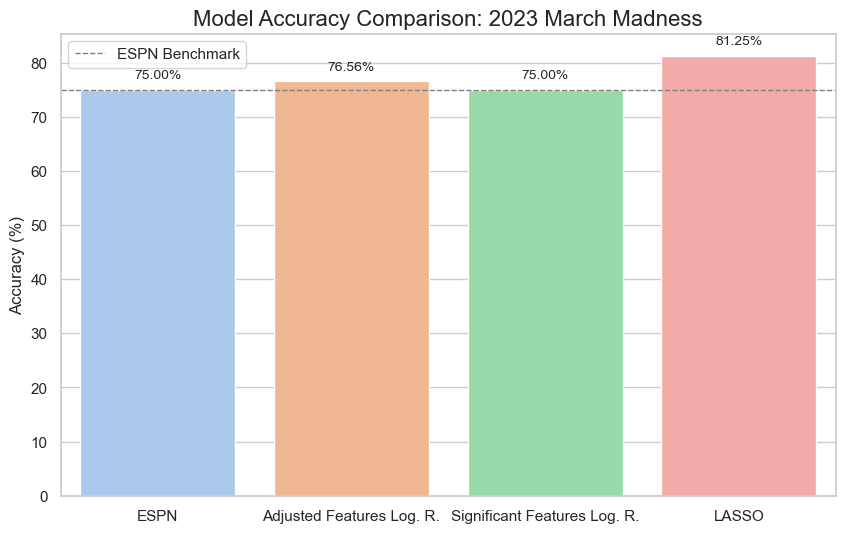

In [206]:
import seaborn as sns
accuracies = pd.DataFrame(data)

#Below, we add the percent accuracy
accuracies['Accuracy'] = (accuracies['# of Teams Categorized Correctly'] / 64) * 100

#Below, we make the background white to make the graph more visually appealing
sns.set(style="whitegrid")

#Below, we give our graph more visually appealing colors
colors = sns.color_palette("pastel")
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Model', y='Accuracy', data=df, palette=colors)

plt.xlabel('')
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('Model Accuracy Comparison: 2023 March Madness', fontsize=16)

#Below, we add the percentages for each model
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

#Below, we draw a dotted line at 75% to make it easier to compare our models to ESPN's
plt.axhline(y=75, color='gray', linestyle='--', linewidth=1, label='ESPN Benchmark')


plt.legend()
plt.show()


## Repeated Statistically Significant Logistic Regression Model ##

Here, we use 192 randomly sampled games from 2008-2023 as our testing data. This adheres to the 80:20 rule so we get a better balance between our training and testing data. We simulate the data 50 times to get a better sense of how accurate the models are. For this one, we use the statistically significant features like before.

In [42]:
march = pd.read_csv('march.csv')
march['R64_W'] = (march['T_WINS'] > 0).astype(int)
march = march[march['FINISH'] != 'R68']

In [43]:
n_simulations = 50

best_metrics = np.zeros(n_simulations)

for i in range(n_simulations):
    march_permuted=march.sample(frac=1)
    Y_train=march_permuted.iloc[192:960].R64_W
    Y_test=march_permuted.iloc[0:192].R64_W

    X_train=march_permuted.iloc[192:960][['W%', 'ADJOE', 'ADJDE','ORB',
       'EFG%', 'EFGD%', 'TOR', 'FTRD', '2P%',
       '2P%D', '3P%D', 'WAB', 'SEED']]
    X_test=march_permuted.iloc[0:192][['W%', 'ADJOE', 'ADJDE','ORB',
       'EFG%', 'EFGD%', 'TOR', 'FTRD', '2P%',
       '2P%D', '3P%D', 'WAB', 'SEED']]

    from sklearn.linear_model import LogisticRegression
    logreg1 = LogisticRegression(max_iter=1000)
    logreg1.fit(X_train, Y_train)
    XtP=logreg1.predict_proba(X_test)

    t_values = np.linspace(0, 1, 100)

    best_t = None
    best_metric = 0.0

    for t in t_values:
        Ypred = np.zeros(len(X_test))
        Ypred[XtP[:, 1] >= t] = 1
        current_metric = sum(Ypred == Y_test) / len(X_test)
    
        if current_metric > best_metric:
            best_metric = current_metric
            best_t = t

    best_metrics[i] = best_metric

average_best_metric = np.mean(best_metrics)

print(f"Average Best Accuracy over {n_simulations} simulations: {average_best_metric}")

Average Best Accuracy over 50 simulations: 0.7438541666666666


/Users/liammatney/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Repeated Adjusted Metrics Logistic Regression Model ##

Just like in the Repeated Statistically Significant Model, we use 192 randomly sampled games as our testing data and the rest as our training data, and simulate it 50 times to get a more precise measure of the accuracy. For this one, we are using the adjusted metrics again.

In [45]:
n_simulations = 50

best_metrics = np.zeros(n_simulations)

for i in range(n_simulations):
    march_permuted=march.sample(frac=1)
    Y_train=march_permuted.iloc[192:960].R64_W
    Y_test=march_permuted.iloc[0:192].R64_W

    X_train=march_permuted.iloc[192:960][['ADJOE','ADJDE','ADJ T.','WAB','SEED']]
    X_test=march_permuted.iloc[0:192][['ADJOE','ADJDE','ADJ T.','WAB','SEED']]

    from sklearn.linear_model import LogisticRegression
    logreg1 = LogisticRegression(max_iter=1000)
    logreg1.fit(X_train, Y_train)
    XtP=logreg1.predict_proba(X_test)

    t_values = np.linspace(0, 1, 100)

    best_t = None
    best_metric = 0.0

    for t in t_values:
        Ypred = np.zeros(len(X_test))
        Ypred[XtP[:, 1] >= t] = 1
        current_metric = sum(Ypred == Y_test) / len(X_test)
    
        if current_metric > best_metric:
            best_metric = current_metric
            best_t = t

    best_metrics[i] = best_metric

average_best_metric = np.mean(best_metrics)

print(f"Average Best Accuracy over {n_simulations} simulations: {average_best_metric}")

Average Best Accuracy over 50 simulations: 0.7440625000000002


## Repeated LASSO Model ##

Just like for the two repeated models above, we are repeating the LASSO model 50 times, using 192 randomly selected teams as our testing data.

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV
from sklearn.metrics import accuracy_score

In [64]:
m = pd.read_csv('march.csv')
m['Round of 64 Result'] = (m['T_WINS'] > 0).astype(int)
columns_to_drop = ['TEAM', 'CONF','FINISH','T_WINS']
m_num = m.drop(columns_to_drop, axis=1)

In [65]:
n_repetitions = 50

optimal_alphas = np.zeros(n_repetitions)
best_thresholds = np.zeros(n_repetitions)
best_accuracies = np.zeros(n_repetitions)

for i in range(n_repetitions):
    m_num_permuted = m_num.sample(frac=1)
    train_data = m_num_permuted.iloc[192:960]
    test_data = m_num_permuted.iloc[0:192]

    Y_train = train_data['Round of 64 Result']
    Y_test = test_data['Round of 64 Result']

    X_train = train_data.drop('Round of 64 Result', axis=1)
    X_test = test_data.drop('Round of 64 Result', axis=1)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    lasso_cv = LassoCV(cv=5)
    lasso_cv.fit(X_train_scaled, Y_train)
    optimal_alpha = lasso_cv.alpha_

    thresholds = np.arange(0.1, 1.0, 0.001)
    best_accuracy = 0.0
    best_threshold = 0.0

    for threshold in thresholds:
        y_pred_binary = (lasso_cv.predict(X_test_scaled) > threshold).astype(int)
        current_accuracy = accuracy_score(Y_test, y_pred_binary)

        if current_accuracy > best_accuracy:
            best_accuracy = current_accuracy
            best_threshold = threshold

    optimal_alphas[i] = optimal_alpha
    best_thresholds[i] = best_threshold
    best_accuracies[i] = best_accuracy

average_optimal_alpha = np.mean(optimal_alphas)
average_best_threshold = np.mean(best_thresholds)
average_best_accuracy = np.mean(best_accuracies)

print(f'\nAverage Optimal Alpha: {average_optimal_alpha}')
print(f'Average Optimal Threshold: {average_best_threshold}')
print(f'Average Maximum Accuracy: {average_best_accuracy}')


Average Optimal Alpha: 0.015457372801325744
Average Optimal Threshold: 0.5103800000000004
Average Maximum Accuracy: 0.7466666666666666


## Accuracy of Repeated Models (Graph) ##

The code below gives us the percentage of times the higher seed won their Round of 64 across our 15 season dataset

In [182]:
march['Round of 64 Result'] = (march['T_WINS'] > 0).astype(int)

higher_seed_wins = march[(march['SEED'] <= 8) & (march['Round of 64 Result'] == 1)].shape[0]
total_games = march.shape[0]/2

percentage_higher_seed_wins = (higher_seed_wins / total_games) * 100

print(f"The percentage of the time that the higher seed (SEED <= 8) wins in March Madness is: {percentage_higher_seed_wins:.2f}%")

The percentage of the time that the higher seed (SEED <= 8) wins in March Madness is: 71.88%


In [183]:
higher_seed_wins
#this code shows the amount of times the higher seed won their game (out of 960/2 = 480 games)

345

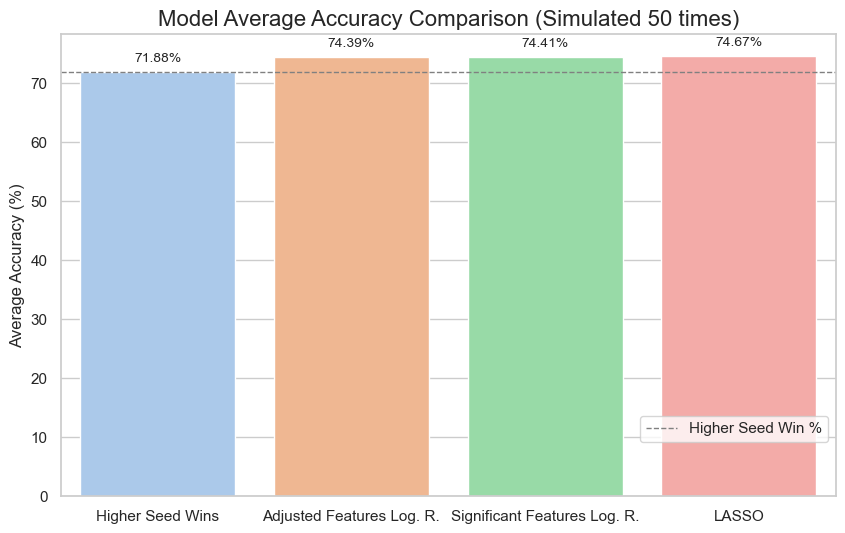

In [199]:
data = {
    'Model': ['Higher Seed Wins', 'Adjusted Features Log. R.', 'Significant Features Log. R.', 'LASSO'],
    'Average Accuracy': [71.88, 74.39, 74.41, 74.67],
}
average_accuracy = pd.DataFrame(data)

#Like we did in the graph earlier, we set the background color to white to make the graph visually appealling
sns.set(style="whitegrid")

#Again, we make the graph have nice colors to make it visually appealling
colors = sns.color_palette("pastel")
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Model', y='Average Accuracy', data=average_accuracy, palette=colors)

plt.xlabel('')
plt.ylabel('Average Accuracy (%)', fontsize=12)
plt.title('Model Average Accuracy Comparison (Simulated 50 times)', fontsize=16)

#Using the below code, we add the percentages above the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

#Here, we calculate where the benchmark line we want to draw will be
benchmark_value = average_accuracy.loc[average_accuracy['Model'] == 'Higher Seed Wins', 'Average Accuracy'].values[0]

#Below, we place a dotted line at the level of the "Higher Seed Wins" column
plt.axhline(y=benchmark_value, color='gray', linestyle='--', linewidth=1, label='Higher Seed Win %')
#Again, the legend to that line was in the way, so we moved it to the bottom right of the graph
plt.legend(loc='lower right', bbox_to_anchor=(1, 0.1))

plt.show()